# 🏙️ NYC Airbnb Exploratory Data Analysis (EDA)

## 📌 Project Overview
This project performs an **end-to-end exploratory data analysis (EDA)** on New York City Airbnb listings to help a **real estate company** identify **high-return investment opportunities**, with a specific focus on **private room listings**.
The analysis combines data from multiple file formats and derives **pricing, demand, and geographic insights** to answer the question:

> **Where should the company invest to maximize returns while minimizing risk?**


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)


## Load Data
Load Airbnb datasets from multiple file formats (CSV, Excel, TSV) into pandas DataFrames.

In [54]:
price_df = pd.read_csv("D:/Project - Exploring AirBNB data to take out insight/data/data/airbnb_price.csv")
room_df = pd.read_excel("D:/Project - Exploring AirBNB data to take out insight/data/data/airbnb_room_type.xlsx")
review_df = pd.read_csv("D:/Project - Exploring AirBNB data to take out insight/data/data/airbnb_last_review.tsv", sep="\t")


## Initial Data Inspection
Inspect the structure, schema, and sample rows of each dataset to understand available features and data quality.

In [55]:
price_df.head(), room_df.head(), review_df.head()


(   listing_id        price                nbhood_full
 0        2595  225 dollars         Manhattan, Midtown
 1        3831   89 dollars     Brooklyn, Clinton Hill
 2        5099  200 dollars     Manhattan, Murray Hill
 3        5178   79 dollars  Manhattan, Hell's Kitchen
 4        5238  150 dollars       Manhattan, Chinatown,
    listing_id                                description        room_type
 0        2595                      Skylit Midtown Castle  Entire home/apt
 1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
 2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
 3        5178            Large Furnished Room Near B'way     private room
 4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt,
    listing_id    host_name   last_review
 0        2595     Jennifer   May 21 2019
 1        3831  LisaRoxanne  July 05 2019
 2        5099        Chris  June 22 2019
 3        5178     Shunichi  June 24 2019
 4      

In [56]:
price_df.info()
room_df.info()
review_df.info()


<class 'pandas.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   listing_id   25209 non-null  int64
 1   price        25209 non-null  str  
 2   nbhood_full  25209 non-null  str  
dtypes: int64(1), str(2)
memory usage: 591.0 KB
<class 'pandas.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  str   
dtypes: int64(1), object(1), str(1)
memory usage: 591.0+ KB
<class 'pandas.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   listing_id   25209 non-null  int64
 1   host_name    25201 non-null  str  
 2   last_review  25209 non-null  st

## 🔗 Data Integration & Modeling
Merge multiple datasets using `listing_id` to create a unified dataset for analysis.

In [57]:
listings = (
    price_df
    .merge(room_df, on="listing_id", how="inner")
    .merge(review_df, on="listing_id", how="inner")
)


In [58]:
# Price cleaning
listings["price_clean"] = (
    listings["price"]
    .str.replace(" dollars", "", regex=False)
    .astype(float)
)

# Room type normalization
listings["room_type"] = listings["room_type"].str.lower().str.strip()

# Date conversion
listings["last_review_date"] = pd.to_datetime(
    listings["last_review"], errors="coerce"
)

# Borough extraction
listings["borough"] = listings["nbhood_full"].str.split(",", expand=True)[0].str.strip()


In [59]:
missing_table = listings.isnull().sum().reset_index()
missing_table.columns = ["column", "missing_values"]
missing_table


,column,missing_values
0,listing_id,0
1,price,0
2,nbhood_full,0
3,description,10
4,room_type,0
5,host_name,8
6,last_review,0
7,price_clean,0
8,last_review_date,0
9,borough,0


## 🛏️ Supply Analysis (Room Types)
Analyze the distribution of Airbnb listings by room type, with a focus on private rooms.

In [60]:
room_type_dist = listings["room_type"].value_counts().reset_index()
room_type_dist.columns = ["room_type", "count"]
room_type_dist


,room_type,count
0,entire home/apt,13266
1,private room,11356
2,shared room,587


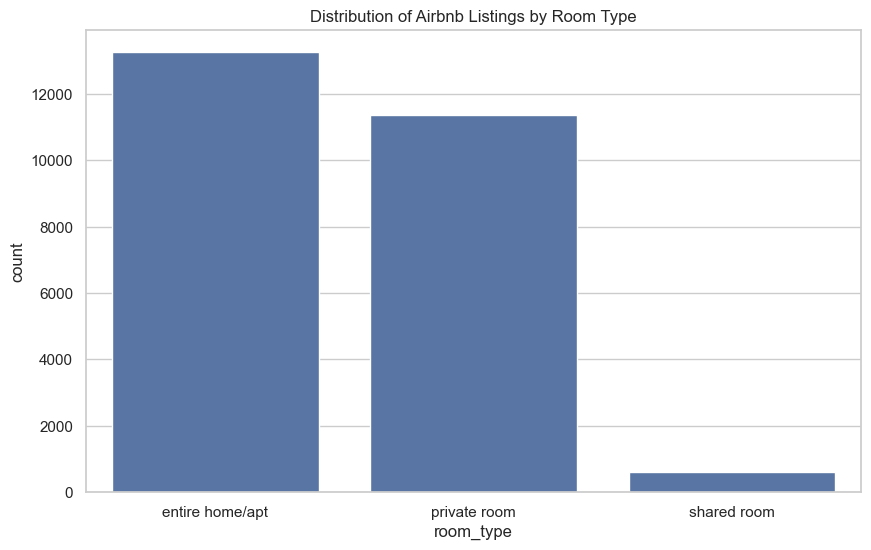

In [61]:
sns.barplot(data=room_type_dist, x="room_type", y="count")
plt.title("Distribution of Airbnb Listings by Room Type")
plt.show()


## 💰 Pricing Analysis
Examine average prices across room types and identify pricing differences between private rooms and other accommodations.

In [62]:
avg_price_room = (
    listings
    .groupby("room_type")["price_clean"]
    .mean()
    .round(2)
    .reset_index()
)
avg_price_room


,room_type,price_clean
0,entire home/apt,197.17
1,private room,81.64
2,shared room,53.47


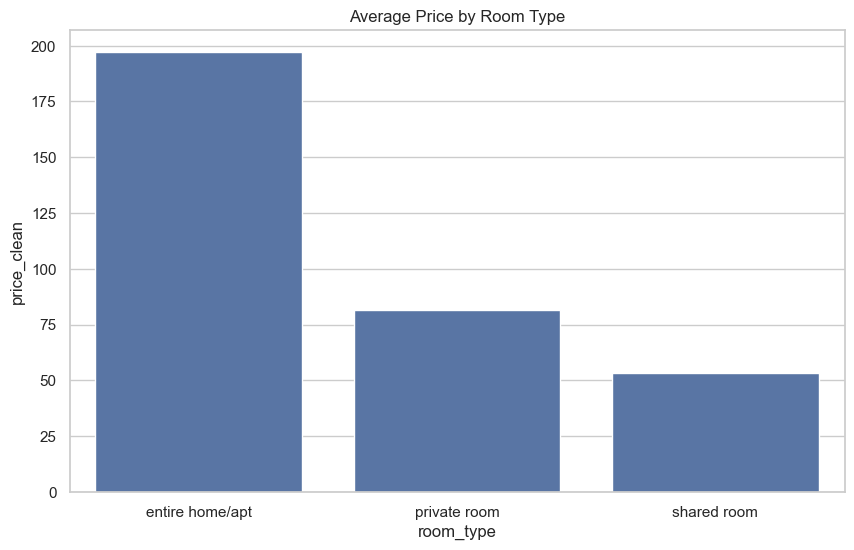

In [63]:
sns.barplot(data=avg_price_room, x="room_type", y="price_clean")
plt.title("Average Price by Room Type")
plt.show()


## 🏙️ Geographic Analysis (Borough & Neighborhood Level)
Analyze pricing trends across boroughs and neighborhoods to identify geographic investment opportunities.


In [64]:
avg_price_borough = (
    listings
    .groupby("borough")["price_clean"]
    .mean()
    .round(2)
    .sort_values()
    .reset_index()
)
avg_price_borough


,borough,price_clean
0,Bronx,79.13
1,Staten Island,86.04
2,Queens,92.81
3,Brooklyn,121.90
4,Manhattan,184.00


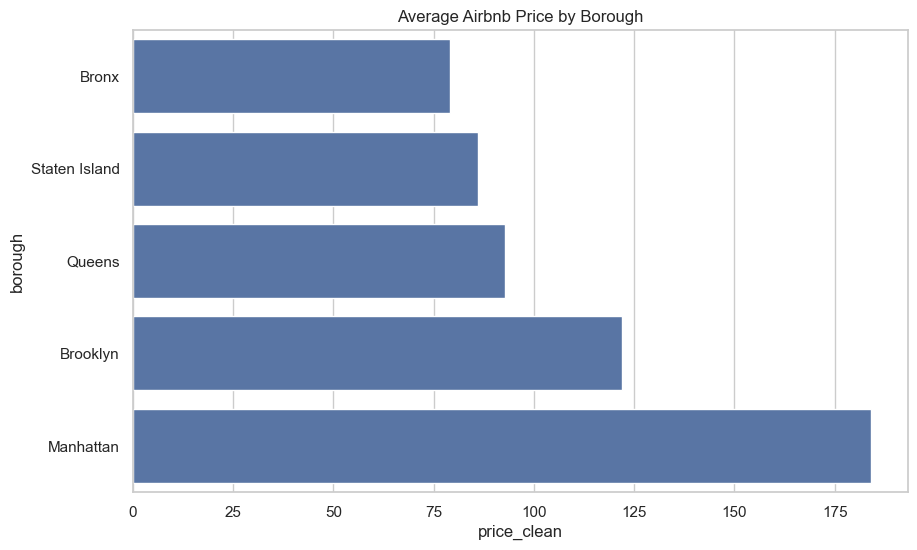

In [65]:
sns.barplot(data=avg_price_borough, x="price_clean", y="borough")
plt.title("Average Airbnb Price by Borough")
plt.show()


In [66]:
recent_cutoff = listings["last_review_date"].max() - pd.DateOffset(years=1)

listings["active"] = listings["last_review_date"] >= recent_cutoff

activity_dist = listings["active"].value_counts().reset_index()
activity_dist.columns = ["active_last_year", "count"]
activity_dist


,active_last_year,count
0,True,25209


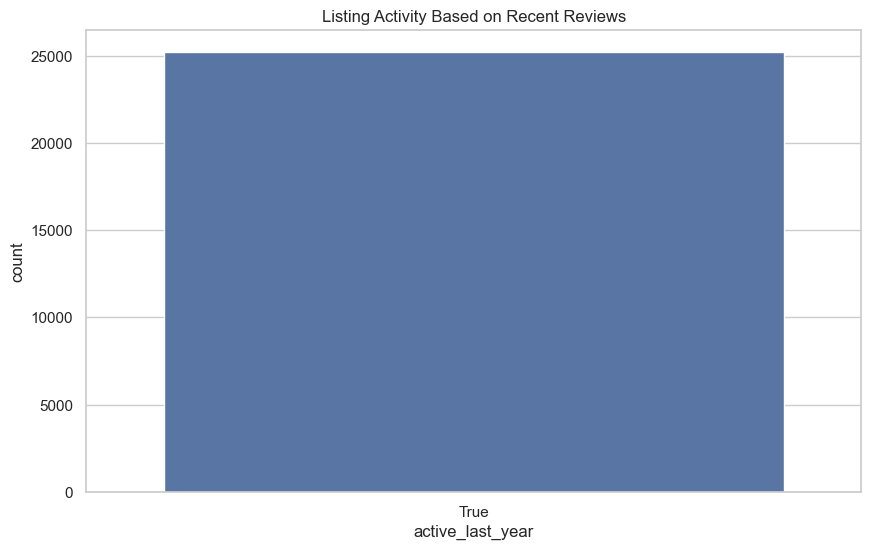

In [67]:
sns.barplot(data=activity_dist, x="active_last_year", y="count")
plt.title("Listing Activity Based on Recent Reviews")
plt.show()


## 🎯 Private Room Focus Analysis
Deep-dive into private room performance across neighborhoods to identify undervalued areas with strong demand.

In [68]:
private_rooms = listings[listings["room_type"] == "private room"]

private_price_borough = (
    private_rooms
    .groupby("borough")["price_clean"]
    .mean()
    .round(2)
    .sort_values()
    .reset_index()
)
private_price_borough


,borough,price_clean
0,Staten Island,56.06
1,Bronx,56.15
2,Queens,63.74
3,Brooklyn,72.63
4,Manhattan,105.70


In [69]:
eda_summary = pd.DataFrame({
    "Metric": [
        "Total Listings",
        "Private Room Listings",
        "Private Room %",
        "Average Price (USD)",
        "Cheapest Borough (Private Rooms)",
        "Most Expensive Borough",
        "Active Listings % (Last 1 Year)"
    ],
    "Value": [
        listings.shape[0],
        private_rooms.shape[0],
        round((private_rooms.shape[0] / listings.shape[0]) * 100, 2),
        round(listings["price_clean"].mean(), 2),
        private_price_borough.iloc[0]["borough"],
        avg_price_borough.iloc[-1]["borough"],
        round((listings["active"].mean()) * 100, 2)
    ]
})

eda_summary


,Metric,Value
0,Total Listings,25209
1,Private Room Listings,11356
2,Private Room %,45.05
3,Average Price (USD),141.78
4,Cheapest Borough (Private Rooms),Staten Island
5,Most Expensive Borough,Manhattan
6,Active Listings % (Last 1 Year),100.00


## 📈  KPI Definition & Investment Scoring
Define key performance indicators (KPIs) and compute an investment score to rank neighborhoods by return potential.

In [70]:
neighborhood_avg_price = (
    listings
    .groupby("nbhood_full")["price_clean"]
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={"price_clean": "avg_price_all"})
)


In [71]:
private_neighborhood_avg = (
    listings[listings["room_type"] == "private room"]
    .groupby("nbhood_full")["price_clean"]
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={"price_clean": "avg_price_private"})
)


In [72]:
price_comparison = (
    neighborhood_avg_price
    .merge(private_neighborhood_avg, on="nbhood_full", how="inner")
)

price_comparison["private_price_ratio"] = (
    price_comparison["avg_price_private"] /
    price_comparison["avg_price_all"]
).round(2)

price_comparison.head()


,nbhood_full,avg_price_all,avg_price_private,private_price_ratio
0,"Bronx, Allerton",98.93,73.06,0.74
1,"Bronx, Baychester",78.60,61.00,0.78
2,"Bronx, Belmont",91.88,61.25,0.67
3,"Bronx, Bronxdale",53.60,45.00,0.84
4,"Bronx, City Island",95.42,72.20,0.76


In [73]:
private_share = (
    listings
    .groupby("nbhood_full")["room_type"]
    .apply(lambda x: (x == "private room").mean())
    .round(2)
    .reset_index()
    .rename(columns={"room_type": "private_room_share"})
)


In [74]:
recent_cutoff = listings["last_review_date"].max() - pd.DateOffset(years=1)

listings["active"] = listings["last_review_date"] >= recent_cutoff

active_rate = (
    listings
    .groupby("nbhood_full")["active"]
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={"active": "active_listing_rate"})
)


In [80]:
investment_kpi = (
    price_comparison
    .merge(private_share, on="nbhood_full")
    .merge(active_rate, on="nbhood_full")
)

investment_kpi["investment_score"] = (
    (1 - investment_kpi["private_price_ratio"]) * 0.4 +
    investment_kpi["private_room_share"] * 0.3 +
    investment_kpi["active_listing_rate"] * 0.3
).round(3)

investment_kpi_sorted = (
    investment_kpi
    .sort_values("investment_score", ascending=False)
)

investment_kpi_sorted.head(10)



,nbhood_full,avg_price_all,avg_price_private,private_price_ratio,private_room_share,active_listing_rate,investment_score
126,"Queens, Bayside",185.96,48.18,0.26,0.61,1.00,0.78
43,"Bronx, Westchester Square",127.44,52.00,0.41,0.56,1.00,0.70
184,"Staten Island, New Brighton",101.80,65.00,0.64,0.80,1.00,0.68
180,"Staten Island, Graniteville",68.67,20.00,0.29,0.33,1.00,0.68
192,"Staten Island, South Beach",99.14,69.83,0.70,0.86,1.00,0.68
22,"Bronx, Morrisania",78.00,44.50,0.57,0.67,1.00,0.67
36,"Bronx, Spuyten Duyvil",180.00,60.00,0.33,0.33,1.00,0.67
151,"Queens, Jamaica Hills",168.40,66.00,0.39,0.40,1.00,0.66
168,"Queens, St. Albans",102.02,54.06,0.53,0.57,1.00,0.66
127,"Queens, Bayswater",93.33,56.50,0.61,0.67,1.00,0.66


##  Executive Summary Table
Create a consolidated summary of key metrics and findings for quick stakeholder interpretation.

In [76]:
top_neighborhoods = investment_kpi_sorted.head(10)[
    [
        "nbhood_full",
        "avg_price_all",
        "avg_price_private",
        "private_price_ratio",
        "private_room_share",
        "active_listing_rate",
        "investment_score"
    ]
]

top_neighborhoods


,nbhood_full,avg_price_all,avg_price_private,private_price_ratio,private_room_share,active_listing_rate,investment_score
126,"Queens, Bayside",185.96,48.18,0.26,0.61,1.00,0.78
43,"Bronx, Westchester Square",127.44,52.00,0.41,0.56,1.00,0.70
184,"Staten Island, New Brighton",101.80,65.00,0.64,0.80,1.00,0.68
180,"Staten Island, Graniteville",68.67,20.00,0.29,0.33,1.00,0.68
192,"Staten Island, South Beach",99.14,69.83,0.70,0.86,1.00,0.68
22,"Bronx, Morrisania",78.00,44.50,0.57,0.67,1.00,0.67
36,"Bronx, Spuyten Duyvil",180.00,60.00,0.33,0.33,1.00,0.67
151,"Queens, Jamaica Hills",168.40,66.00,0.39,0.40,1.00,0.66
168,"Queens, St. Albans",102.02,54.06,0.53,0.57,1.00,0.66
127,"Queens, Bayswater",93.33,56.50,0.61,0.67,1.00,0.66


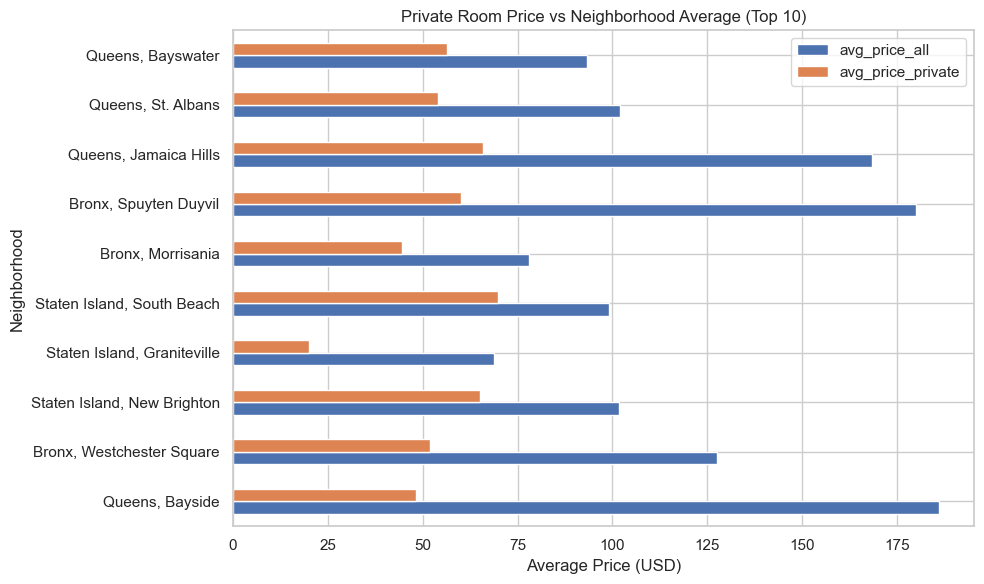

In [77]:
top10 = top_neighborhoods.set_index("nbhood_full")

top10[["avg_price_all", "avg_price_private"]].plot(
    kind="barh",
    figsize=(10, 6)
)

plt.title("Private Room Price vs Neighborhood Average (Top 10)")
plt.xlabel("Average Price (USD)")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()


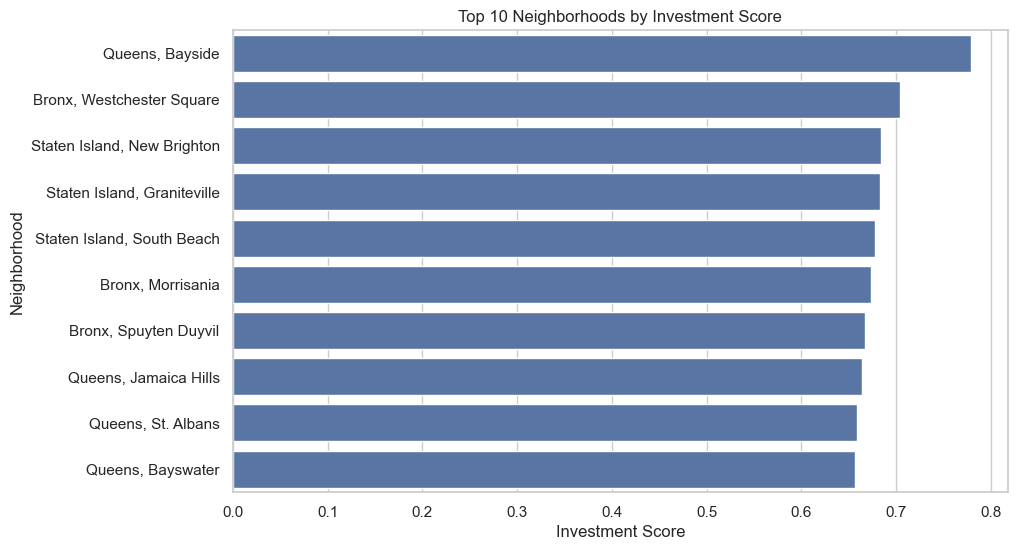

In [78]:
sns.barplot(
    data=investment_kpi_sorted.head(10),
    x="investment_score",
    y="nbhood_full"
)

plt.title("Top 10 Neighborhoods by Investment Score")
plt.xlabel("Investment Score")
plt.ylabel("Neighborhood")
plt.show()
